# CAI Lab Session 9: simulation of SI model of contagion over contact networks

In [27]:
import igraph as ig
import matplotlib.pyplot as plt
import random

In [35]:
def spread(g, alpha): 
    g.vs['infected'] = False
    g.vs['color'] = 'lightblue'

    initial_node = random.choice(g.vs).index

    g.vs[initial_node]['infected'] = True
    g.vs[initial_node]['color'] = 'red'

    steps = 0

    fig, ax = plt.subplots(4, 4, figsize=(20, 20))
     
    while len(g.vs.select(infected=True)) < g.vcount():
        for v in g.vs.select(infected=True):
            for neighbor in v.neighbors():
                if neighbor['infected'] == False and random.random() < alpha:
                    neighbor['infected'] = True
                    neighbor['color'] = 'red'
        
        ig.plot(
            g,
            target=ax[steps // 4, steps % 4],
            vertex_size=20,
            vertex_label=range(g.vcount()),
            layout=g.layout("circle")
        );
        
        ax[steps // 4, steps % 4].set_title(f"Step {steps}, Infected: {len(g.vs.select(infected=True))}")
        
        steps += 1
    
    for i in range(steps, 16):
        ax[i // 4, i % 4].axis('off')

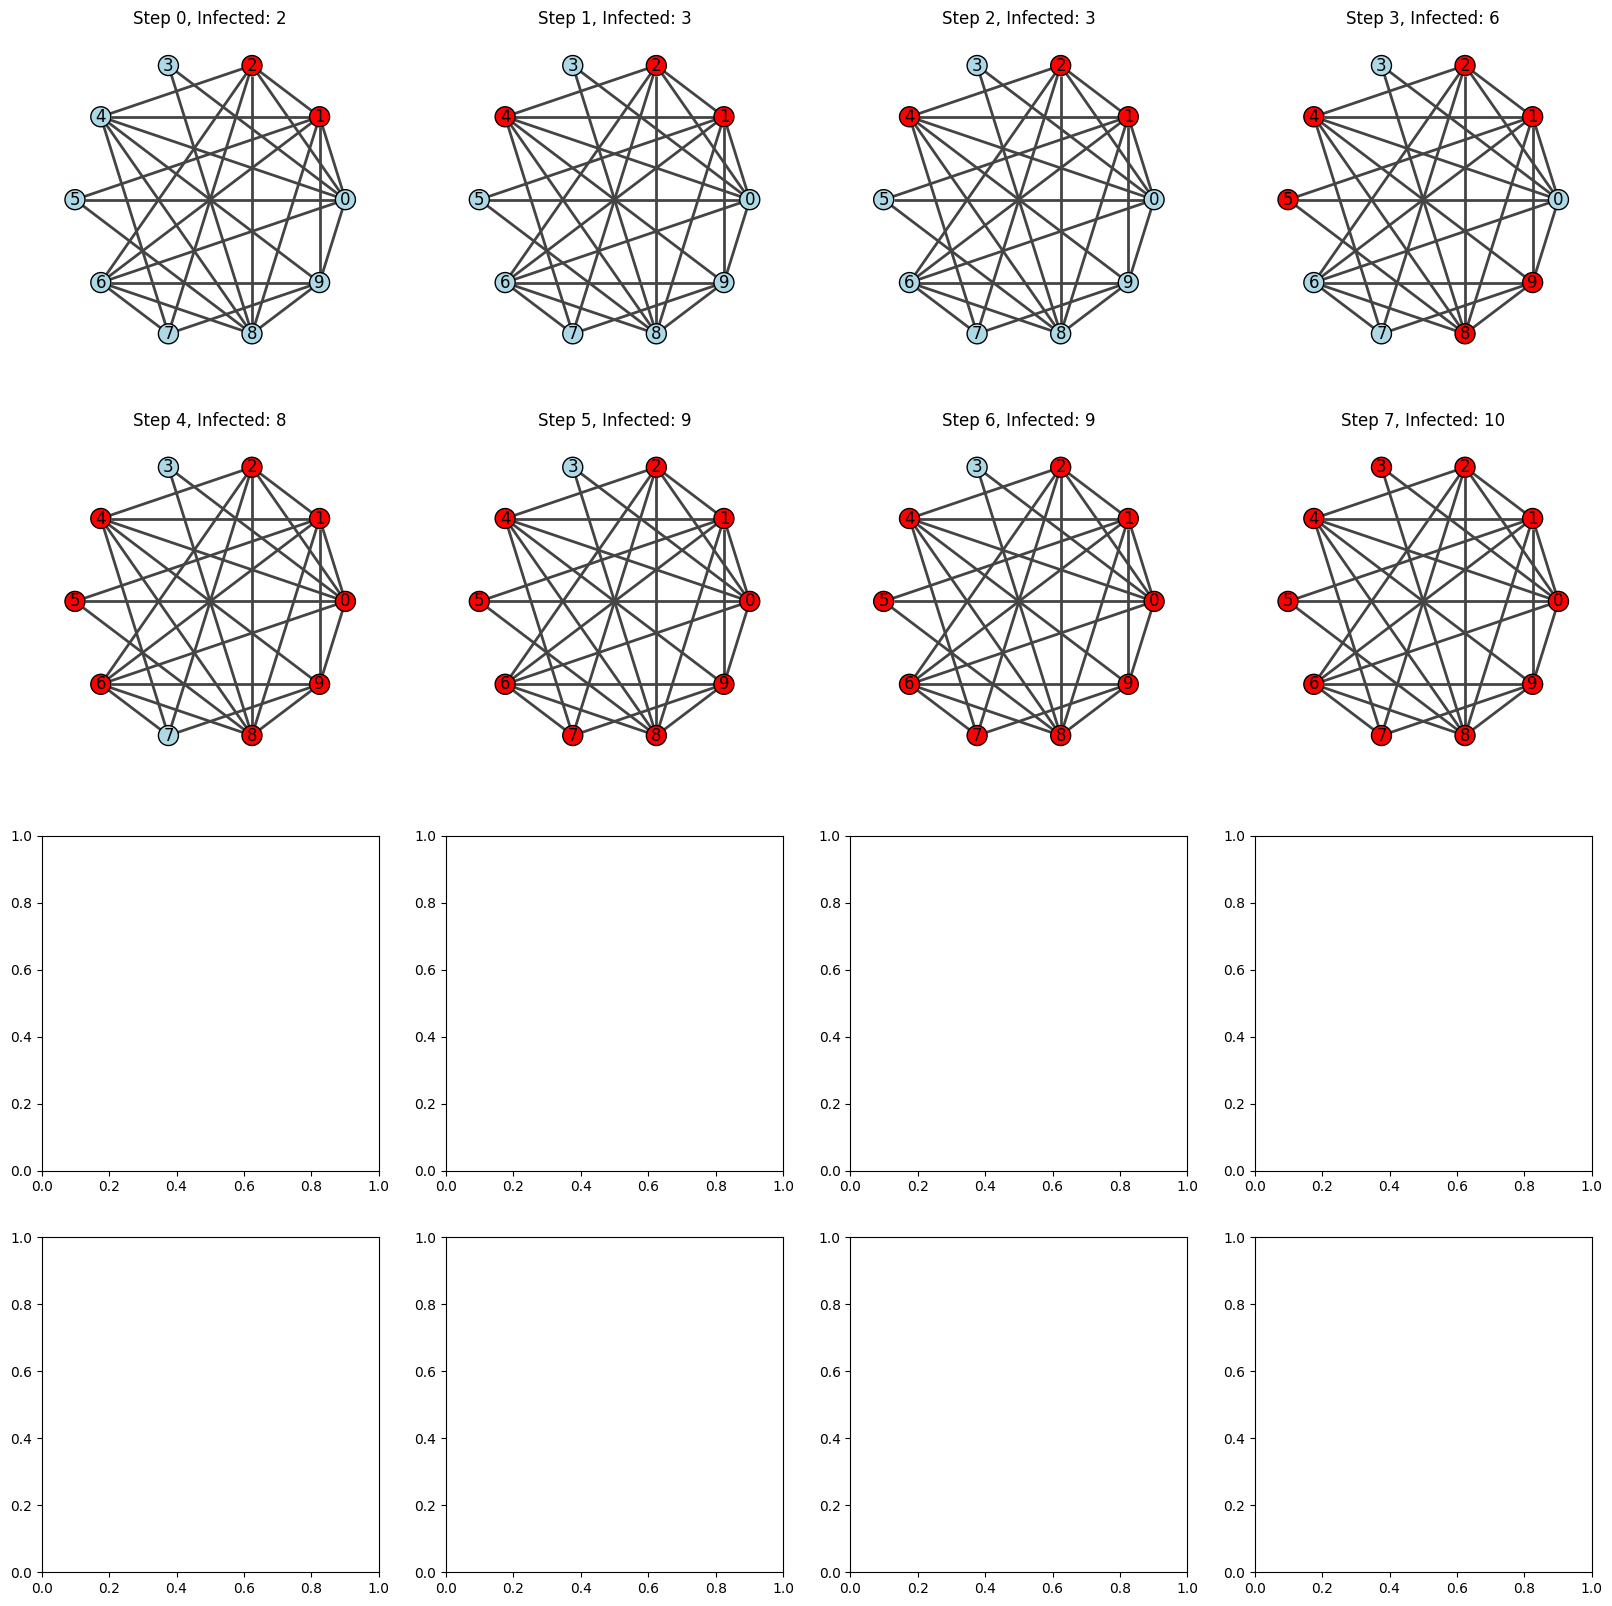

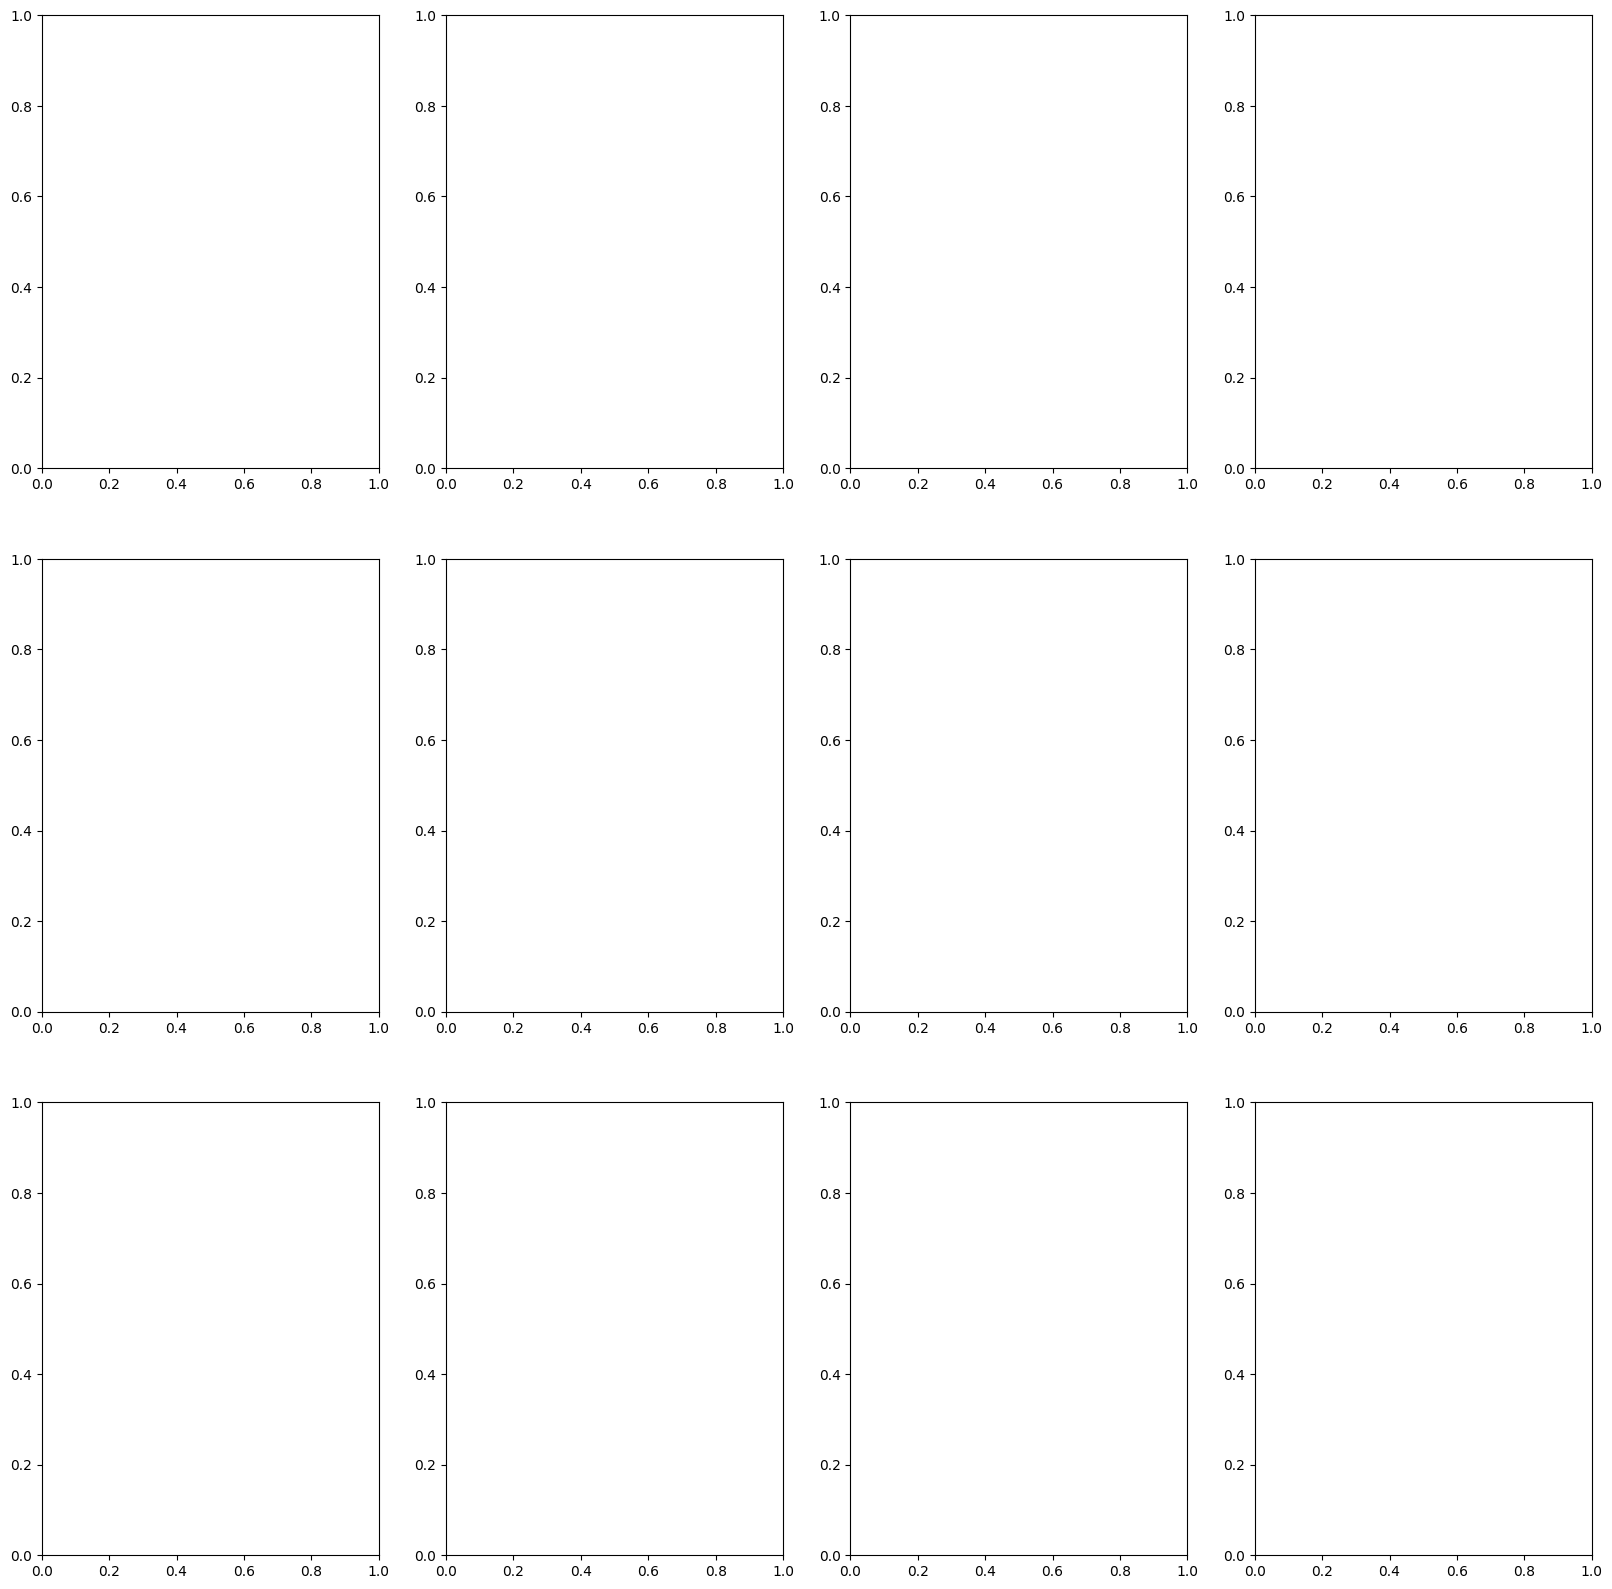

In [36]:
g = ig.Graph.Erdos_Renyi(10, 0.5)
spread(g, 0.2)

## 4. Your tasks



Study evolution of infection over time for different topologies. Here, there are several things that you may play with (be creative!):

- underlying contact networks: you should consider at least the ones seen in class (Erdös-Rényii, Watts-Strogatz, and Barabasi-Albert) but there are others already implemented that may be of interest (Tree, Lattice, etc.)
- patient 0 selection: random selection, or select patient 0 with smallest/largest centrality, etc.
- infection rate: how does the infection rate affect speed of spreading for different topologies?

Things that may be of importance:

- graphs should be large enough (at least $n=1000$ nodes) so that interesting things may happen
- graphs should be _connected_ so that all nodes may be reachable by patient 0

In [ ]:
import random
 
def select_initial_node(g, method): 
  if method == 1: # random
    return random.choice(g.vs).index
  if method == 2: # max degree
    return g.vs.degree().index(max(g.vs.degree()))
  if method == 3: # min degree
    return g.vs.degree().index(min(g.vs.degree()))
  if method == 4: # max betweenness
    return g.vs.betweenness().index(max(g.vs.betweenness()))
  if method == 5: # min betweenness
    return g.vs.betweenness().index(min(g.vs.betweenness()))
  if method == 6: # max closeness
    return g.vs.closeness().index(max(g.vs.closeness()))
  if method == 7: # min closeness
    return g.vs.closeness().index(min(g.vs.closeness()))


def spread(g, alpha, initial_node_method): 
  g.vs['infected'] = False
  
  initial_node = select_initial_node(g, initial_node_method)
  g.vs[initial_node]['infected'] = True
  
  steps = 0
  evolution = []
  stop_condition = 0
  
  while len(g.vs.select(infected=True)) < g.vcount() and stop_condition < 1000:
    infected = len(g.vs.select(infected=True)) 
    for v in g.vs.select(infected=True):
      for neighbor in v.neighbors():
        if neighbor['infected'] == False and random.random() < alpha:
          neighbor['infected'] = True
    
    if infected == len(g.vs.select(infected=True)):
      stop_condition += 1
    else:
      stop_condition = 0  
    
    steps += 1
    evolution.append(len(g.vs.select(infected=True)))
          
  return steps, evolution

In [ ]:
n = 1000
m = 2000

In [ ]:
# connected = False
# while not connected:
#     g1 = ig.Graph.Erdos_Renyi(n, m=m)
#     connected = g1.is_connected()

# connected = False
# while not connected:
#     g2 = ig.Graph.Barabasi(n, m=(m//n))
#     connected = g2.is_connected()
    
# connected = False
# while not connected:
#     g3 = ig.Graph.Watts_Strogatz(1, n, m//n, 0.1)
#     connected = g3.is_connected()

In [ ]:
# alphas = [0.1, 0.3, 0.5, 0.7]
# methods = [1, 2, 3, 4, 5, 6, 7]
# graphs = [g1, g2, g3]

# results = {}

# for i, g in enumerate(graphs):
#   for a in alphas:
#     for method in methods:
#       # print(i, a, method)
#       results[(i, a, method)] = spread(g, a, method)

In [ ]:
# import pandas as pd

# df = pd.DataFrame.from_dict(results, orient='index')
# df.reset_index(inplace=True)
# df[['graph', 'alpha', 'method']] = pd.DataFrame(df['index'].tolist(), index=df.index)
# df = df.drop(columns=['index'])
# df = df.rename(columns={0: 'steps'})
# df = df.rename(columns={1: 'evolution'})

# method_names = {1: 'random', 
#                 2: 'max degree', 
#                 3: 'min degree', 
#                 4: 'max betweenness', 
#                 5: 'min betweenness', 
#                 6: 'max closeness', 
#                 7: 'min closeness'}

# df['method'] = df['method'].map(method_names)
# df.head()

In [ ]:
# import altair as alt

# def create_heatmap(df, graph):
#   return alt.Chart(df[df['graph'] == graph]).mark_rect().encode(
#     x = alt.X('alpha:O', title='Alpha', axis=alt.Axis(labelAngle=0)),
#     y = alt.Y('method:O', title='Initial node selection method'),
#     color = alt.Color('steps:Q', title='Steps')
#   ).properties(
#     width=500,
#     height=300
#   )

# create_heatmap(df, 0) & create_heatmap(df, 1) & create_heatmap(df, 2)  

In [ ]:
# import numpy as np
# row = df.sample(1)
# df1 = pd.DataFrame({'evolution': row['evolution'].values[0], 'steps': np.arange(1, len(row['evolution'].values[0])+1)})

In [ ]:
# alt.Chart(df1).mark_line().encode(
#   x = alt.X('steps:Q', title='Steps'),
#   y = alt.Y('evolution:Q', title='Infected nodes')
# ).properties(
#   width=500,
#   height=300
# )

## 5. Rules of delivery

- To be solved in _pairs_.

- No plagiarism; don't discuss your work with other teams. You can ask for help to others for simple things, such as recalling a python instruction or module, but nothing too specific to the session.

- If you feel you are spending much more time than the rest of the classmates, ask us for help. Questions can be asked either in person or by email, and you'll never be penalized by asking questions, no matter how stupid they look in retrospect.

- Write a short report listing the solutions to the exercises proposed. Include things like the important parts of your implementation (data structures used for representing objects, algorithms used, etc). You are welcome to add conclusions and findings that depart from what we asked you to do. We encourage you to discuss the difficulties you find; this lets us give you help and also improve the lab session for future editions.

- Turn the report to PDF. Make sure it has your names, date, and title. Include your code in your submission.

- Submit your work through the [raco](http://www.fib.upc.edu/en/serveis/raco.html) _before January 10th, 2024_.